In [1]:
import warnings
warnings.filterwarnings('ignore')
import wradlib as wrl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.colors import from_levels_and_colors
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.cm as cm
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np
import datetime as dt
from osgeo import osr
import numpy as np
import glob

In [2]:
def get_radar_locations():

    radars = {}
    radar = {}
    radar['name'] = 'ASR Dresden'
    radar['wmo'] = 10487
    radar['lon'] = 13.76347
    radar['lat'] = 51.12404
    radar['alt'] = 261
    radars['ASD'] = radar
    
    radar = {}
    #### Kordinaten un hoehe checken! Neu
    # Hoehe üNN 2m
    # Turm 55 m
    #radar['name'] = 'Borkum'
    #radar['wmo'] = 10103
    #radar['lon'] = 6.748292
    #radar['lat'] = 53.564011
    #radar['alt'] = 57.
    #radars['ASB'] = radar
    
    #Fake Borkum/Emden
    radar['name'] = 'Emden'
    radar['wmo'] = 10103
    radar['lon'] = 7.02377
    radar['lat'] = 53.33872
    radar['alt'] = 58.
    radars['ASB'] = radar

    radar = {}
    radar['name'] = 'Boostedt'
    radar['wmo'] = 10132
    radar['lon'] = 10.04687
    radar['lat'] = 54.00438
    radar['alt'] = 124.56
    radars['BOO'] = radar

    radar = {}
    radar['name'] = 'Dresden'
    radar['wmo'] = 10488
    radar['lon'] = 13.76865
    radar['lat'] = 51.12465
    radar['alt'] = 263.36
    radars['DRS'] = radar

    radar = {}
    radar['name'] = 'Eisberg'
    radar['wmo'] = 10780
    radar['lon'] = 12.40278
    radar['lat'] = 49.54066
    radar['alt'] = 798.79
    radars['EIS'] = radar

    radar = {}
    radar['name'] = 'Emden'
    radar['wmo'] = 10204
    radar['lon'] = 7.02377
    radar['lat'] = 53.33872
    radar['alt'] = 58
    radars['EMD'] = radar

    radar = {}
    radar['name'] = 'Essen'
    radar['wmo'] = 10410
    radar['lon'] = 6.96712
    radar['lat'] = 51.40563
    radar['alt'] = 185.10
    radars['ESS'] = radar

    radar = {}
    radar['name'] = 'Feldberg'
    radar['wmo'] = 10908
    radar['lon'] = 8.00361
    radar['lat'] = 47.87361
    radar['alt'] = 1516.10
    radars['FBG'] = radar

    radar = {}
    radar['name'] = 'Flechtdorf'
    radar['wmo'] = 10440
    radar['lon'] = 8.802
    radar['lat'] = 51.3112
    radar['alt'] = 627.88
    radars['FLD'] = radar

    radar = {}
    radar['name'] = 'Hannover'
    radar['wmo'] = 10339
    radar['lon'] = 9.69452
    radar['lat'] = 52.46008
    radar['alt'] = 97.66
    radars['HNR'] = radar

    radar = {}
    radar['name'] = 'Neuhaus'
    radar['wmo'] = 10557
    radar['lon'] = 11.13504
    radar['lat'] = 50.50012
    radar['alt'] = 878.04
    radars['NEU'] = radar

    radar = {}
    radar['name'] = 'Neuheilenbach'
    radar['wmo'] = 10605
    radar['lon'] = 6.54853
    radar['lat'] = 50.10965
    radar['alt'] = 585.84
    radars['NHB'] = radar

    radar = {}
    radar['name'] = 'Offenthal'
    radar['wmo'] = 10629
    radar['lon'] = 8.71293
    radar['lat'] = 49.9847
    radar['alt'] = 245.80
    radars['OFT'] = radar

    radar = {}
    radar['name'] = 'Proetzel'
    radar['wmo'] = 10392
    radar['lon'] = 13.85821
    radar['lat'] = 52.64867
    radar['alt'] = 193.92
    radars['PRO'] = radar

    radar = {}
    radar['name'] = 'Memmingen'
    radar['wmo'] = 10950
    radar['lon'] = 10.21924
    radar['lat'] = 48.04214
    radar['alt'] = 724.40
    radars['MEM'] = radar

    radar = {}
    radar['name'] = 'Rostock'
    radar['wmo'] = 10169
    radar['lon'] = 12.05808
    radar['lat'] = 54.17566
    radar['alt'] = 37
    radars['ROS'] = radar

    radar = {}
    radar['name'] = 'Isen'
    radar['wmo'] = 10873
    radar['lon'] = 12.10177
    radar['lat'] = 48.1747
    radar['alt'] = 677.77
    radars['ISN'] = radar

    radar = {}
    radar['name'] = 'Tuerkheim'
    radar['wmo'] = 10832
    radar['lon'] = 9.78278
    radar['lat'] = 48.58528
    radar['alt'] = 767.62
    radars['TUR'] = radar

    radar = {}
    radar['name'] = 'Ummendorf'
    radar['wmo'] = 10356
    radar['lon'] = 11.17609
    radar['lat'] = 52.16009
    radar['alt'] = 183
    radars['UMM'] = radar

    
    return radars


In [3]:
#ZP = '201410070235'
ZP = '201803072145'
#ZP = '201409072140'

def read_all_dx(ZP):
    """
    Func to read all 14 C-band DX files with diffrent elevation pattern for the precipitation scan
    """
    
    radar_range = 150

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/test_for_height/*'

    #print (path)
    c_liste = sorted(glob.glob(path))
    #print c_liste
    #print (c_liste)
    nr_rad = len(c_liste)
    #print (nr_rad)
    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,radar_range))
    all_lat = np.empty((nr_rad,360,radar_range))
    all_alt = np.empty((nr_rad,360,radar_range))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.readDX(filename)


    radloc = get_radar_locations()
    #print radloc

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):
        #print rr

        for ir in radloc.keys():
            #print ir

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:
                print(str(radloc[ir]['wmo']),metadata[rr]['radarid'],radloc[ir]['lon'],radloc[ir]['lat'],radloc[ir]['name'])
                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:

                pass

    print radname
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])
        
        azimuths = metadata[rrr]['azim']
        
        ranges = np.arange(0,radar_range)*1000 
        
        elevations = metadata[rrr]['elev']
        
        if (lon0[rrr]==6.748292) & (lat0[rrr]==53.564011) & (alt0[rrr]==57.):
            print ("Elevationen bei Borkum geändert!")
            elevations = (elevations / elevations) * 0.9
            
        print('--->>> Elevations: ', np.unique(elevations))
        #print 'elevation: ', elevations

        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)
        
        grid = wrl.georef.polar.spherical_to_proj(polargrid[0], polargrid[1],elevgrid[1], radar_location)
        #print '----->', polargrid[0].shape
        #print '----->', polargrid[1].shape

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)
        
        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt
        print np.nanmax(alt)


    return all_lon, all_lat, all_alt, all_scans

In [4]:
#ZP = '201410070235'
ZP = '201803072145'
#ZP = '201409072140'

def read_all_dx(ZP):
    """
    Func to read all 14 C-band DX files with diffrent elevation pattern for the precipitation scan
    """
    
    radar_range = 150

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/test_for_height/*'

    #print (path)
    c_liste = sorted(glob.glob(path))
    #print c_liste
    #print (c_liste)
    nr_rad = len(c_liste)
    #print (nr_rad)
    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,radar_range))
    all_lat = np.empty((nr_rad,360,radar_range))
    all_alt = np.empty((nr_rad,360,radar_range))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.read_dx(filename)


    radloc = get_radar_locations()
    #print radloc

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):
        #print rr

        for ir in radloc.keys():
            #print ir

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:
                print(str(radloc[ir]['wmo']),metadata[rr]['radarid'],radloc[ir]['lon'],radloc[ir]['lat'],radloc[ir]['name'])
                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:

                pass

    print radname
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])
        
        azimuths = metadata[rrr]['azim']
        
        ranges = np.arange(0,radar_range)*1000 
        
        elevations = metadata[rrr]['elev']
        
        if (lon0[rrr]==7.02377) & (lat0[rrr]==53.33872) & (alt0[rrr]==58.):
            print ("Elevationen bei Emden eingestellt!")
            # Hier werden einfach alle Elevation auf eins gesetzt und mit der 0.9 Elevation wie in Emden eingestellt
            elevations = (elevations / elevations) * 0.9
            
        print('--->>> Elevations: ', np.unique(elevations))
        #print 'elevation: ', elevations

        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)
        
        r = polargrid[0]

        theta = metadata[rrr]['elev']

        rrrc = r.T * np.cos(np.deg2rad(theta))
        rrrc = rrrc.T
        print (rrrc.shape, polargrid[1].shape, elevgrid[1].shape)
        #print np.unique(elevgrid[0])
        grid = wrl.georef.polar.spherical_to_proj(rrrc, polargrid[1],elevgrid[1], radar_location)
        #print '----->', polargrid[0].shape
        #print '----->', polargrid[1].shape

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)
        
        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt
        print np.nanmax(alt)


    return all_lon, all_lat, all_alt, all_scans

In [32]:
#ZP = '201410070235'
ZP = '201803072145'
#ZP = '201409072140'

def read_all_dx(ZP):
    
    radar_range = 150

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/test_for_height/*'

    #print (path)
    c_liste = sorted(glob.glob(path))
    #print c_liste
    #print (c_liste)
    nr_rad = len(c_liste)
    #print (nr_rad)
    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,radar_range))
    all_lat = np.empty((nr_rad,360,radar_range))
    all_alt = np.empty((nr_rad,360,radar_range))
    all_kkk = np.empty((nr_rad,360,radar_range))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.read_dx(filename)


    radloc = get_radar_locations()
    #print radloc

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):
        
        #print rr

        for ir in radloc.keys():
            #print ir

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:
                print(str(radloc[ir]['wmo']),metadata[rr]['radarid'],radloc[ir]['lon'],radloc[ir]['lat'],radloc[ir]['name'])
                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:

                pass

    print radname
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])
        
        azimuths = metadata[rrr]['azim']
        
        ranges = np.arange(0,radar_range)*1000 
        
        elevations = metadata[rrr]['elev']
        
        if (lon0[rrr]==7.02377) & (lat0[rrr]==53.33872) & (alt0[rrr]==58.):
            print ("Elevationen bei Emden eingestellt!")
            # Hier werden einfach alle Elevation auf eins gesetzt und mit der 0.9 Elevation wie in Emden eingestellt
            elevations = (elevations / elevations) * 0.9
            
        print('--->>> Elevations: ', np.unique(elevations))
        #print 'elevation: ', elevations

        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)
        
        r = polargrid[0]

        theta = metadata[rrr]['elev']

        # Ray distance
        rrrc = r.T * np.cos(np.deg2rad(theta))
        rrrc = rrrc.T
        
        # Keulenbreite
        alpha = 0.9 # C-band Offnungswinkel
        kkk =rrrc * np.sin(np.deg2rad(alpha)) 
        
        print (rrrc.shape, polargrid[1].shape, elevgrid[1].shape)
        #print np.unique(elevgrid[0])
        grid = wrl.georef.polar.spherical_to_proj(rrrc, polargrid[1],elevgrid[1], radar_location)
        #print '----->', polargrid[0].shape
        #print '----->', polargrid[1].shape

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)
        
        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt
        all_kkk[rrr,:,:] = kkk
        all_rad[rrr,:,:] = (kkk/kkk)*rrr
        
        #print ('Max Alt:', np.nanmax(alt))
        #print ('Shapes: ', lon.shape, lat.shape, alt.shape)


    return all_lon, all_lat, all_alt,all_kkk, all_scans, all_rad

In [33]:
#Einlesen aller DX Standorte
#all_lon, all_lat, all_alt, all_scans = read_all_dx(ZP)
all_lon, all_lat, all_alt,all_kkk, all_scans, all_rad = read_all_dx(ZP)

('10103', '10103', 7.02377, 53.33872, 'Emden')
('10132', '10132', 10.04687, 54.00438, 'Boostedt')
('10169', '10169', 12.05808, 54.17566, 'Rostock')
('10339', '10339', 9.69452, 52.46008, 'Hannover')
('10356', '10356', 11.17609, 52.16009, 'Ummendorf')
('10392', '10392', 13.85821, 52.64867, 'Proetzel')
('10410', '10410', 6.96712, 51.40563, 'Essen')
('10440', '10440', 8.802, 51.3112, 'Flechtdorf')
('10488', '10488', 13.76865, 51.12465, 'Dresden')
('10557', '10557', 11.13504, 50.50012, 'Neuhaus')
('10605', '10605', 6.54853, 50.10965, 'Neuheilenbach')
('10629', '10629', 8.71293, 49.9847, 'Offenthal')
('10780', '10780', 12.40278, 49.54066, 'Eisberg')
('10832', '10832', 9.78278, 48.58528, 'Tuerkheim')
('10873', '10873', 12.10177, 48.1747, 'Isen')
('10908', '10908', 8.00361, 47.87361, 'Feldberg')
('10950', '10950', 10.21924, 48.04214, 'Memmingen')
['Emden', 'Boostedt', 'Rostock', 'Hannover', 'Ummendorf', 'Proetzel', 'Essen', 'Flechtdorf', 'Dresden', 'Neuhaus', 'Neuheilenbach', 'Offenthal', 'Eis

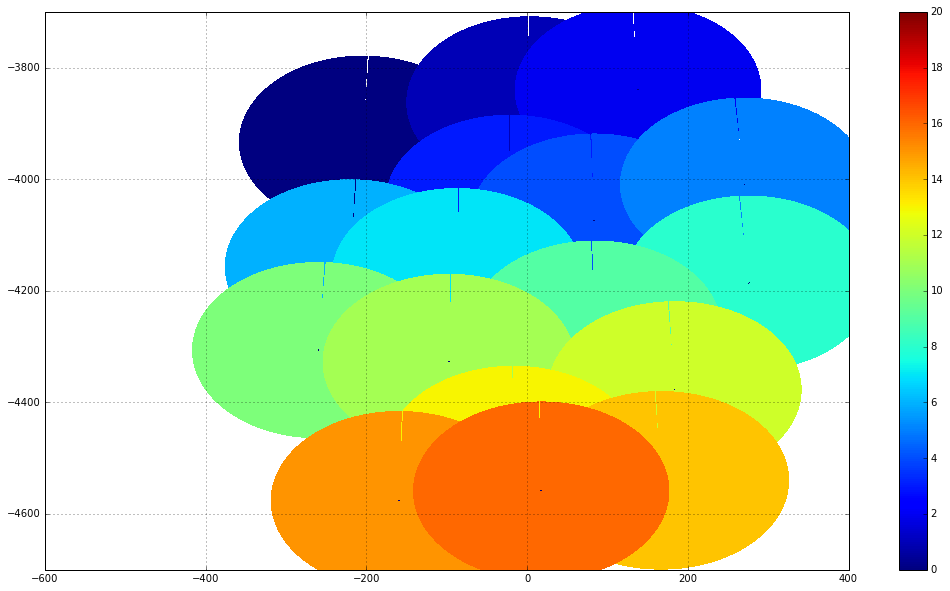

In [34]:
plt.figure(figsize=(18,10))

for plpl in range(all_lon.shape[0]):
    #print plpl
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_rad[plpl,...], vmin=0, vmax=20)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.grid()

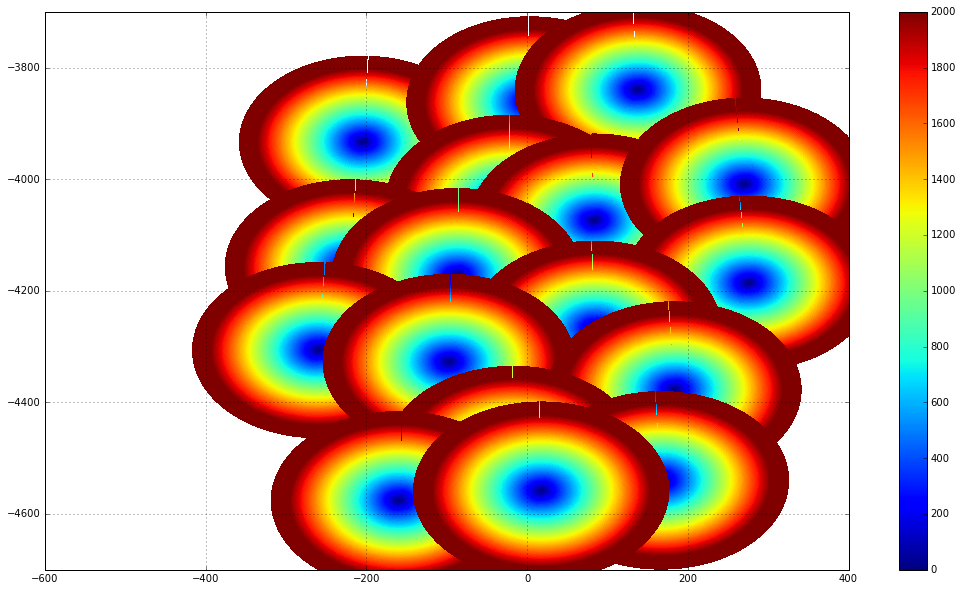

In [23]:
plt.figure(figsize=(18,10))

for plpl in range(all_lon.shape[0]):
    #print plpl
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_kkk[plpl,...], vmin=0, vmax=2000)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.grid()

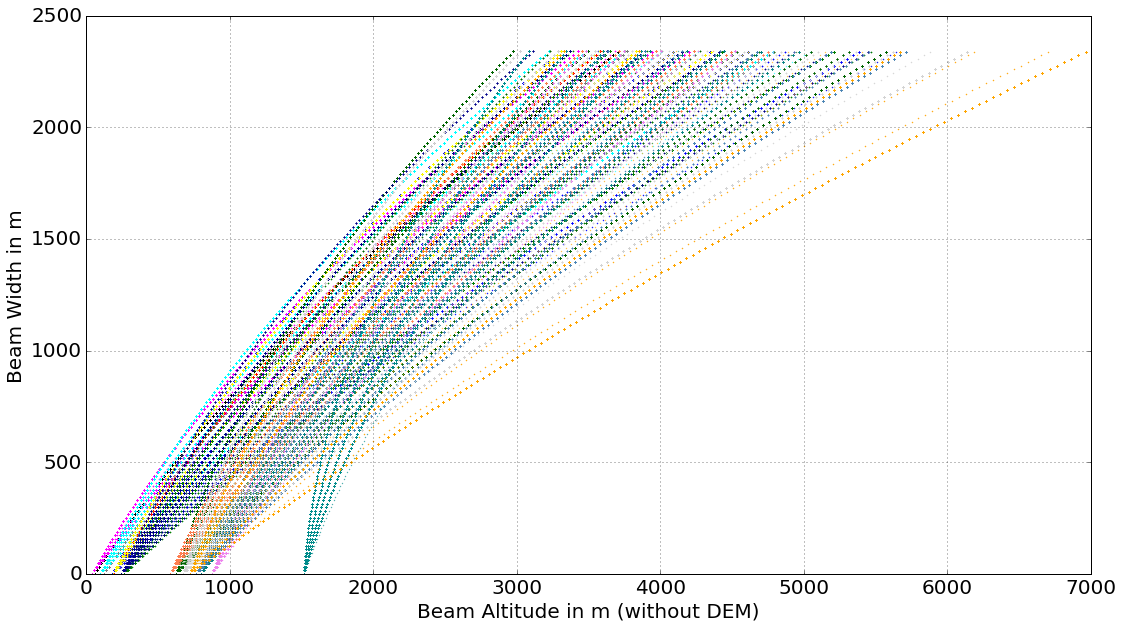

In [17]:
plt.figure(figsize=(18,10))

color=('black', 'gray', 'magenta', 'cyan', 'blue', 'red', 'yellow', 'darkgreen', 'green',
      'violet', 'coral', 'darkblue', 'teal', 'steelblue', 'lightgray', 'darkcyan', 'orange')

for plpl in range(all_lon.shape[0]):
    #print plpl
    plt.scatter(all_alt[plpl,...], all_kkk[plpl,...], color=color[plpl], s=0.1, marker='o', alpha=1,
               edgecolors=None)

plt.xlim(0,7000)
plt.ylim(0, 2500)
#plt.colorbar()
plt.xlabel('Beam Altitude in m (without DEM)', fontsize=20)
plt.ylabel('Beam Width in m', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()

In [11]:
# RADOLAN GRID LADEN
print(wrl.georef.get_radolan_grid().shape)
x = wrl.georef.get_radolan_grid(900,900)[:,:,0]
y = wrl.georef.get_radolan_grid(900,900)[:,:,1]
print (x.shape, y.shape)

(900, 900, 2)
((900, 900), (900, 900))


### Interpolate dx on RADOLAN gird
-------------------------------

In [8]:
def ipoli_radi(gr_grid, gr_data,sr_grid,radius):
    """

    Parameters
    ----------
    gr_grid ::: grid of the Ground Radar
    gr_data ::: data of the Ground Radar
    sr_grid ::: grid oft the Spaceborn Radar
    radius  ::: radius of the dpr foot prints


    Returns
    -------
    gs_grid ::: Interpolated Groundradar Data on Spaceborne Grid

    """

    gr_ipoli_data_min = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_max = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_mean = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_std = np.zeros((sr_grid.shape[0]))

    for i in range(sr_grid.shape[0]):

        x0, y0 = sr_grid[i,0], sr_grid[i,1]  ###########x y richtig?

        rr = np.sqrt((gr_grid[:,0] - x0)**2 + (gr_grid[:,1] - y0)**2)
        ## Todo: hier fehlt die Wichtung
        #print (gr_data[rr < radius])
        #gr_ipoli_data[i] = np.nanmean(gr_data[rr < radius])
        if gr_data[rr < radius].size!=0:

            gr_ipoli_data_max[i] = np.nanmax(gr_data[rr < radius])
            gr_ipoli_data_min[i] = np.nanmin(gr_data[rr < radius])
            gr_ipoli_data_mean[i] = np.nanmean(gr_data[rr < radius])
            gr_ipoli_data_std[i] = np.nanstd(gr_data[rr < radius])
        else:
            gr_ipoli_data_max[i] = np.nan
            gr_ipoli_data_min[i] = np.nan
            gr_ipoli_data_mean[i] = np.nan
            gr_ipoli_data_std[i] = np.nan
            # mein Pull Verfahren
            # pull_range = 1 #km
            # gr_ipoli_data[i] = np.nanmax(gr_data[rr < radius + pull_range])

    return gr_ipoli_data_max, gr_ipoli_data_min, gr_ipoli_data_mean, gr_ipoli_data_std

In [9]:
def ipoli_radi_dem(gr_grid, gr_data,sr_grid,radius):
    """

    Parameters
    ----------
    gr_grid ::: grid of the Ground Radar
    gr_data ::: data of the Ground Radar
    sr_grid ::: grid oft the Spaceborn Radar
    radius  ::: radius of the dpr foot prints


    Returns
    -------
    gs_grid ::: Interpolated Groundradar Data on Spaceborne Grid

    """

    gr_ipoli_data_min = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_max = np.zeros((sr_grid.shape[0]))

    for i in range(sr_grid.shape[0]):

        x0, y0 = sr_grid[i,0], sr_grid[i,1]  ###########x y richtig?

        rr = np.sqrt((gr_grid[:,0] - x0)**2 + (gr_grid[:,1] - y0)**2)
        ## Todo: hier fehlt die Wichtung
        #print (gr_data[rr < radius])
        #gr_ipoli_data[i] = np.nanmean(gr_data[rr < radius])
        if gr_data[rr < radius].size!=0:

            gr_ipoli_data_max[i] = np.nanmax(gr_data[rr < radius])
            gr_ipoli_data_min[i] = np.nanmin(gr_data[rr < radius])
        else:
            gr_ipoli_data_max[i] = np.nan
            gr_ipoli_data_min[i] = np.nan
            # mein Pull Verfahren
            # pull_range = 1 #km
            # gr_ipoli_data[i] = np.nanmax(gr_data[rr < radius + pull_range])

    return gr_ipoli_data_max, gr_ipoli_data_min

In [10]:
def ipoli_radi_fast(xy_cut, gpm_xy,rwdata_cut, dpr_footprint, k=25):
    """
    ...
    """
    from scipy.spatial import cKDTree

    # cKDTree radolan
    tree = cKDTree(xy_cut)

    # cKDTree gpm dpr
    tree_gpm = cKDTree(gpm_xy)

    dists, ix = tree.query(gpm_xy, k=k) # k maximal possible ry pixel in dpr footprint
    ix2 = tree.query_ball_point(gpm_xy, dpr_footprint)

    ry_pns_w = []

    for i in range(ix.shape[0]):
        #i is all points in one dpr footprint
        #distancen for all i
        index = np.isin(ix[i,:],ix2[i] )
        res1 = np.nanmean(rwdata_cut.ravel()[ix[i,:][index]])
    

        ry_pns_w.append(res1)


    return np.array(ry_pns_w)   

In [12]:
def ipoli_radi_nearest(gr_grid, gr_data,sr_grid, gr_beam_width):
    """

    Parameters
    ----------
    gr_grid ::: grid of the Ground Radar
    gr_data ::: data of the Ground Radar
    sr_grid ::: grid oft the Spaceborn Radar
    gr_beam_width ::: additional gr data like beam width


    Returns
    -------
    gr_grid ::: Interpolated Groundradar Data on Spaceborne Grid
    gr_beam_width ::: Interpolated additional ground data on sr grid

    """

    gr_ipoli_data = np.zeros((sr_grid.shape[0]))
    gr_ipoli_beam_width = np.zeros((sr_grid.shape[0]))


    c = 0
    e = 0
    for i in range(sr_grid.shape[0]):

        x0, y0 = sr_grid[i,0], sr_grid[i,1]  ###########x y richtig?

        rr = np.sqrt((gr_grid[:,0] - x0)**2 + (gr_grid[:,1] - y0)**2)

        # an welchen stellen befinden sich die nahesten Punkte
        idx = np.where(rr==np.nanmin(rr))
        
        # bei mehrfacher belegung nan setzen, weil Hoehe nicht eindeutig
        if len(idx[0]) != 1:
            gr_ipoli_data[i] = np.nan
            gr_ipoli_beam_width[i] = np.nan
            c = c + 1
        # bei eindeutiger belegung Hoehe eindeutig
        else:    
            gr_ipoli_data[i] = gr_data[idx]
            gr_ipoli_beam_width[i] = gr_beam_width[idx]
            e = e + 1
        
        
    print('Mehrfachbelegung: ', c)
    print('Einfachbelegung: ', e)

    
    return gr_ipoli_data, gr_ipoli_beam_width

In [ ]:
"""%%time

#dx
xy_dx = np.vstack((all_lon.ravel(), all_lat.ravel())).transpose()
#radolan
grid_xy = np.vstack((x.ravel(), y.ravel())).transpose()

h_on_radolan_max, h_on_radolan_min, h_on_radolan_mean, h_on_radolan_std   = ipoli_radi(xy_dx, all_alt.ravel(), grid_xy, 1.5)
h_on_radolan_max = h_on_radolan_max.reshape(x.shape)
h_on_radolan_min = h_on_radolan_min.reshape(x.shape)
h_on_radolan_mean = h_on_radolan_mean.reshape(x.shape)
h_on_radolan_std = h_on_radolan_std.reshape(x.shape)"""

In [40]:
%%time

#dx koordinates
xy_dx = np.vstack((all_lon.ravel(), all_lat.ravel())).transpose()
#radolan grid
grid_xy = np.vstack((x.ravel(), y.ravel())).transpose()

h_on_radolan, c_on_radolan   = ipoli_radi_nearest(xy_dx, all_alt.ravel(), grid_xy, all_kkk.ravel())
h_on_radolan = h_on_radolan.reshape(x.shape)
c_on_radolan = c_on_radolan.reshape(x.shape)



('Mehrfachbelegung: ', 268475)
('Einfachbelegung: ', 541525)
CPU times: user 3h 12min 11s, sys: 4.76 s, total: 3h 12min 15s
Wall time: 3h 12min 25s


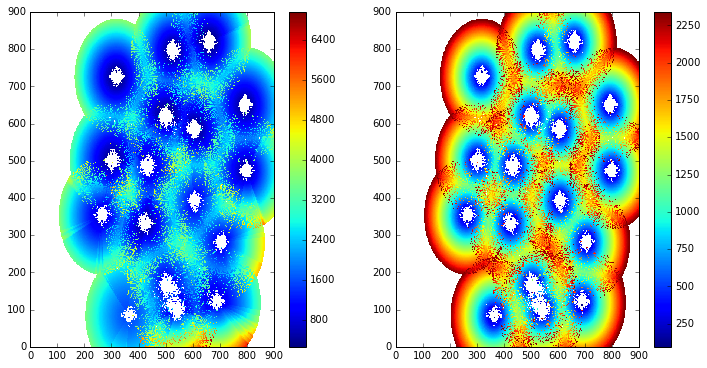

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pcolormesh(np.ma.masked_invalid(h_on_radolan) * np.ma.masked_invalid(rm))
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolormesh(np.ma.masked_invalid(c_on_radolan) * np.ma.masked_invalid(rm))
plt.colorbar()
#plt.savefig('/automount/ftp/velibor/gpm/nearest_4deci_mehrfach_')

(900, 900)


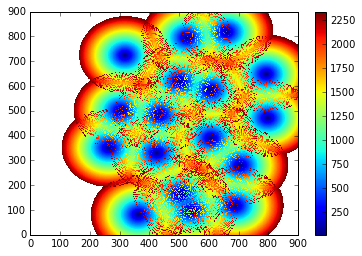

In [53]:
plt.pcolormesh(np.ma.masked_invalid(c_on_radolan) * np.ma.masked_invalid(rm))
plt.colorbar()
print(h_on_radolan.shape)
#plt.savefig("/automount/ftp/velibor/radplot.png")


In [19]:
rm = np.load("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xystd_900x900.npy")[2]
rm = rm/rm
print(np.ma.masked_invalid(np.unique(rm)))

[1.0 -- -- ... -- -- --]


In [ ]:
# RADOLAN H without DEM
rh_without_dem = np.ma.masked_invalid(h_on_radolan) * np.ma.masked_invalid(rm)
rh_without_dem.dump('/automount/ags/velibor/data/radolan_dx/RADOLAN_H_XYNEAREST_without_DEM_900x900.npy')


a = np.load('/automount/ags/velibor/data/radolan_dx/RADOLAN_H_XYNEAREST_without_DEM_900x900.npy')


In [54]:
# RADOLAN C without DEM
rc_without_dem = np.ma.masked_invalid(c_on_radolan) * np.ma.masked_invalid(rm)

rcwd = np.ma.filled(rc_without_dem .astype(float), np.nan)
np.save('/automount/ftp/velibor/data/dem/rhwd',rcwd)

#rc_without_dem.dump('/automount/ags/velibor/data/radolan_dx/RADOLAN_H_XYNEAREST_columns_900x900.npy')

In [50]:
np.load('/automount/ags/velibor/data/radolan_dx/RADOLAN_H_XYNEAREST_columns_900x900.npy')

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20)

In [ ]:
plt.figure(figsize=(12,12))
plt.pcolormesh(a- np.ma.masked_invalid(val_dem[::-1, :]), vmin=0, vmax=4000)
plt.colorbar()

In [ ]:
rh_with_dem = a- np.ma.masked_invalid(val_dem[::-1, :])

rh_with_dem.dump('/automount/ags/velibor/data/radolan_dx/RADOLAN_H_XYNEAREST_with_DEM_900x900.npy')
b = np.load('/automount/ags/velibor/data/radolan_dx/RADOLAN_H_XYNEAREST_with_DEM_900x900.npy')


In [ ]:
rhwd = np.ma.filled(rh_with_dem .astype(float), np.nan)
np.save('/automount/ftp/velibor/data/dem/rhwd',rhwd)

In [ ]:
np.unique(rhwd)

In [ ]:
plt.figure(figsize=(12,12))
plt.pcolormesh(rhwd, vmin=0, vmax=4000)
plt.colorbar()

In [ ]:
np.unique(rh_without_dem)

In [ ]:
## Save
## ----

#radolan_tif_path = '/automount/db01/python/data/DEM/radolan/radolan_1100x900.tif'
#ds = wrl.io.open_raster(radolan_tif_path)
#ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
#cor_dem = wrl.georef.raster.read_gdal_coordinates(ds,mode='centers')
#val_dem = wrl.georef.raster.read_gdal_values(ds)

#np.save("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xymax_1100x900.npy",[x,y, h_on_radolan_max])
#np.save("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xymin_1100x900.npy",[x,y, h_on_radolan_min])
#np.save("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xymean_1100x900.npy",[x,y, h_on_radolan_mean])
#np.save("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xystd_1100x900.npy",[x,y, h_on_radolan_std])


In [12]:
## Radolan tif
## ----

radolan_tif_path = '/automount/db01/python/data/DEM/radolan/radolan_900x900.tif'
ds = wrl.io.open_raster(radolan_tif_path)
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
cor_dem = wrl.georef.raster.read_gdal_coordinates(ds,mode='centers')
val_dem = wrl.georef.raster.read_gdal_values(ds)

In [13]:
rstd = np.load("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xystd_900x900.npy")[2]

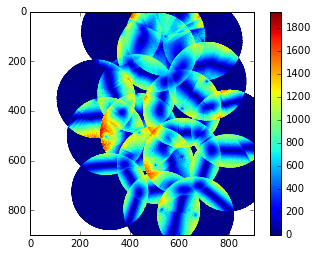

In [14]:
plt.imshow(rstd)
plt.colorbar()

In [ ]:
-np.ma.masked_invalid(val_dem[::-1, :])

In [ ]:
#h_on_radolan_max, h_on_radolan_min, h_on_radolan_mean, h_on_radolan_std
plt.imshow(h_on_radolan_std)
plt.colorbar()

In [ ]:
# Save
#np.save("/automount/ags/velibor/data/radolan_dx/RY_maxHxy_b2017.npy",[x,y, h_on_radolan_max])
#np.save("/automount/ags/velibor/data/radolan_dx/RY_minHxy_b2017.npy",[x,y, h_on_radolan_min])


In [15]:
rhmax = np.load("/automount/ags/velibor/data/radolan_dx/RY_maxHxy_b2017.npy")
rhmin = np.load("/automount/ags/velibor/data/radolan_dx/RY_minHxy_b2017.npy")

In [16]:
from pcc import plot_borders
from pcc import plot_radar
from pcc import plot_radar2
from pcc import plot_dem

In [17]:
def plot_radar(radar, ax, proj):

    site = (radar['lon'], radar['lat'], radar['alt'] )
    
    r = np.arange(1, 151) * 1000

    # azimuth array 1 degree spacing
    az = np.linspace(0, 360, 361)[0:-1]

    # build polygons for maxrange rangering
    polygons = wrl.georef.spherical_to_polyvert(r, az, 0,
                                                site,
                                                proj=proj)
    polygons = polygons[..., 0:2]
    polygons.shape = (len(az), len(r), 5, 2)
    polygons = polygons[:, -1, :, :]

    x_loc, y_loc = wrl.georef.reproject(site[0], site[1],
                                        projection_source=proj_wgs,
                                        projection_target=proj)


    # create PolyCollections and add to respective axes
    polycoll = mpl.collections.PolyCollection(polygons, closed=True,
                                              edgecolors='k',
                                              facecolors='k')
    ax.add_collection(polycoll, autolim=True)

    # plot radar location and information text
    #ax.scatter(x_loc, y_loc, s=40, color='red', edgecolors='black')
    #ax.text(x_loc, y_loc, radar['name'], color='k')



In [18]:
def plot_all_cband2(ax):
    for i in get_radar_locations().keys():

        if i =='EMD':
            pass
        else:
            plot_radar(get_radar_locations()[i], ax , proj_stereo)
            


In [19]:
# create radolan projection object
proj_stereo = wrl.georef.create_osr("dwd-radolan")

# create wgs84 projection object
proj_wgs = osr.SpatialReference()
proj_wgs.ImportFromEPSG(4326)

0

### Read DEM Data for RADOLAN
-------------------------------

In [20]:
rhmax = np.load("/automount/ags/velibor/data/radolan_dx/RY_maxHxy_b2017.npy")
rhmin = np.load("/automount/ags/velibor/data/radolan_dx/RY_minHxy_b2017.npy")

In [21]:
radolan_tif_path = '/automount/db01/python/data/DEM/radolan/radolan_900x900.tif'
ds = wrl.io.open_raster(radolan_tif_path)
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
cor_dem = wrl.georef.raster.read_gdal_coordinates(ds,mode='centers')
val_dem = wrl.georef.raster.read_gdal_values(ds)

In [22]:
cor_dem = wrl.georef.raster.read_gdal_coordinates(ds,mode='centers')
val_dem = wrl.georef.raster.read_gdal_values(ds)
print(cor_dem.shape, val_dem.shape)
#cor_dem = cor_dem[:,0:900, :]
#val_dem = val_dem[:,0:900]

((900, 900, 3), (900, 900))


In [23]:
val_dem0 = val_dem.copy()
val_dem[val_dem<0]=0

NameError: name 'cc' is not defined

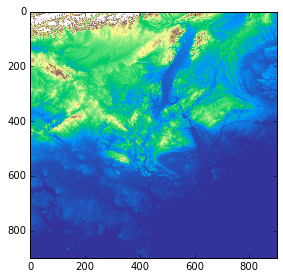

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(val_dem[::-1, ::-1],  cmap=cm.terrain,vmin=0, vmax=1500)
plt.colorbar(shrink=cc)
plt.subplot(1,3,2)
plt.imshow(np.ma.masked_invalid(h_on_radolan_min),  cmap=cm.jet,vmin=0, vmax=4000)
plt.colorbar(shrink=cc)
plt.subplot(1,3,3)
plt.imshow(h_on_radolan_min- np.ma.masked_invalid(val_dem[::-1, :]),  cmap=cm.jet,vmin=0, vmax=4000)
plt.colorbar(shrink=cc)

In [ ]:
a = val_dem[::-1, :]

np.save("/automount/ftp/velibor/radolan_dem.npy", a)

In [ ]:
a.shape

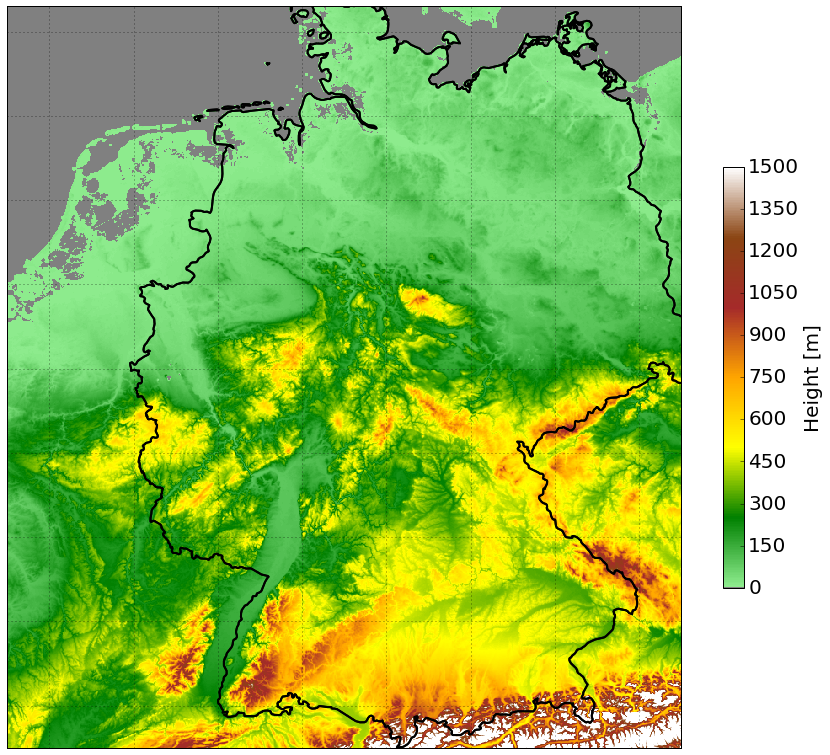

In [25]:
cc=0.5
def get_miub_cmap():
    import matplotlib.colors as col
    #startcolor = 'blue'  # a dark olive
    #color1 = 'blue'
    color3 = 'lightgreen'
    color4 = 'green'
    color5 = 'yellow'
    color6 = 'orange'
    color7 = 'brown'
    color8 = 'saddlebrown'
    #color6 = 'grey'
    endcolor = 'white'    # medium dark red
    colors = [ color3, color4, color5, color6, color7, color8, endcolor]
    return col.LinearSegmentedColormap.from_list('miub1',colors)


fig = plt.figure(figsize=(12,12))

ax4 = fig.add_subplot(111, aspect='equal')

cmap3 = get_miub_cmap()
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                    val_dem0+8,  cmap=cmap3,
                    vmin=0, vmax=1500)

#plot_all_cband2(ax4)
a = plot_borders(ax4)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
# pad
# W-pad
# H_pad
#plt.subplots_adjust(hspace=0.1,wspace = 0.1 )
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [34]:
def get_borders():
    # Landesgrenzen Deutschlands
    from osgeo import osr
    import wradlib as wrl
    import wradlib
    import numpy as np
    
    gxy = []
    wgs84 = osr.SpatialReference()
    wgs84.ImportFromEPSG(4326)
    india = osr.SpatialReference()
    # asia south albers equal area conic
    india.ImportFromEPSG(102028)

    proj_gk = osr.SpatialReference()
    proj_gk.ImportFromEPSG(31466)
    proj_ll = osr.SpatialReference()
    proj_ll.ImportFromEPSG(4326)
    gk3 = wradlib.georef.epsg_to_osr(31467)
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    # country list
    countries = ['Germany']#,'France','Denmark', 'Netherlands', 'Poland']
    # open the input data source and get the layer
    filename = wradlib.util.get_wradlib_data_file('/automount/db01/python/data/NED/10m/cultural/10m_cultural/10m_cultural/ne_10m_admin_0_countries.shp')
    dataset, inLayer = wradlib.io.open_vector(filename)
    # iterate over countries, filter accordingly, get coordinates and plot
    for item in countries:
        #print item
        # SQL-like selection syntax
        fattr = "(name='"+item+"')"
        inLayer.SetAttributeFilter(fattr)
        # get borders and names
        borders, keys = wradlib.georef.get_vector_coordinates(inLayer, key='name')

        for j in range(borders.shape[0]):
            bu = np.array(borders[j].shape)
            a = np.array(bu.shape)

            if a==1:
                for i in range(0,borders[j].shape[0],1):
                    bordx, bordy = wrl.georef.reproject(borders[j][i][:,0], borders[j][i][:,1], projection_source=proj_wgs, projection_target=proj_stereo)
                    bord_xy = np.vstack((bordx.ravel(), bordy.ravel())).transpose()

                    gxy.append(bord_xy)
                    
            if a==2:    #richtig
                bordx, bordy = wrl.georef.reproject(borders[j][:,0], borders[j][:,1], projection_source=proj_wgs, projection_target=proj_stereo)
                bord_xy = np.vstack((bordx.ravel(), bordy.ravel())).transpose()
                gxy.append(bord_xy)

            #bord_xy = np.vstack((bordx.ravel(), bordy.ravel())).transpose()

            #gxy.append(bord_xy)
            
    return gxy    


In [132]:
gbx = []
gby = []

borders = get_borders()
len(borders[20])

for i in range(len(borders)):
    print i 
    print borders[i][:,0]
    gbx.append(borders[i][:,0])
    gbx.append( np.nan)
    gby.append( borders[i][:,1])
    gby.append( np.nan)

GX = np.array(gbx)
GY = np.array(gby)
GX = np.concatenate((GX),axis=None)
GY = np.concatenate((GY),axis=None)

Gxy = np.vstack((GX.ravel().T, GY.ravel().T))

print(Gxy)

0
[-222.23570107 -221.77532952 -221.36026308 -221.95037868 -222.77221194
 -223.34171258 -224.03633002 -225.07632812 -225.49985677 -226.69011107
 -227.54889814 -227.73068156 -226.90264519 -221.62546914 -219.07200727
 -218.258387   -219.80046188 -222.2257725  -223.50167542 -223.54205626
 -222.79953271 -222.23570107]
1
[-198.20615469 -212.67640397 -210.09232277 -200.77368121 -198.20615469]
2
[-180.26166758 -180.37822711 -180.5658625  -183.78633269 -192.13580444
 -194.84465542 -191.64284652 -187.95058238 -180.26949841 -180.26166758]
3
[-175.05004347 -174.20380677 -174.43936208 -174.67406836 -175.2114419
 -177.89132074 -178.88845911 -177.73097627 -176.33491421 -175.05004347]
4
[-124.22493264 -125.34233479 -125.68177022 -126.26288418 -126.6302032
 -127.03750058 -127.77186234 -127.74610397 -126.84648408 -125.4901705
 -123.97305516 -122.56901025 -123.54181154 -124.22493264]
5
[-161.08352459 -161.18755878 -161.35301625 -161.53950028 -166.48033199
 -168.79617679 -169.06586709 -171.05909445 -171.

In [133]:
np.save('/automount/ftp/velibor/data/german_boarders.npy',Gxy)

In [131]:
Gxy.shape



(2, 29)

In [ ]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds = np.arange(0,6000,400)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cc=0.6
######################################################################################################################


fig = plt.figure(figsize=(16,16))
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(223, aspect='equal')
colmap = 'jet'
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan_max)-np.ma.masked_invalid(val_dem[::-1, :]),
               vmin=0, vmax=6000, cmap=cmap, norm=norm)
#plt.title('c) Maximum beam height', fontsize=20)
plot_borders(ax1)
plot_all_cband2(ax1)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.grid()
#plt.axis('off')

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

######################################################################################################################
ax2 = fig.add_subplot(222, aspect='equal')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan_min-np.ma.masked_invalid(val_dem[::-1, :])), vmin=0,vmax=6000
               , cmap=cmap, norm=norm )
#plt.title('b) Minimum beam height', fontsize=20)
plot_borders(ax2)
plot_all_cband2(ax2)

plt.xlim(-450,350)
plt.ylim(-4650, -3770)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
#plt.axis('off')
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

######################################################################################################################

cmap2 = plt.cm.rainbow
# extract all colors from the .jet map
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
# force the first color entry to be grey
cmaplist2[0] = (.5,.5,.5,1.0)
# create the new map
cmap2 = cmap2.from_list('Custom cmap', cmaplist2, cmap2.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds2 = np.arange(0,4000,300)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

ax3 = fig.add_subplot(224, aspect='equal')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan_max-h_on_radolan_min), vmin=0,vmax=4000,
               cmap=cmap2, norm=norm2 )
#plt.title('d) Maximum beam height range', fontsize=20)

plot_borders(ax3)
plot_all_cband2(ax3)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')

plt.xlim(-450,350)
plt.ylim(-4650, -3770)


######################################################################################################################
ax4 = fig.add_subplot(221, aspect='equal')

cmap3 = get_miub_cmap()
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                    val_dem0+8,  cmap=cmap3 ,
                    vmin=0, vmax=1500)

plot_all_cband2(ax4)
plot_borders(ax4)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
# pad
# W-pad
# H_pad
#plt.subplots_adjust(hspace=0.1,wspace = 0.1 )
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [ ]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds = np.arange(0,6000,400)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cc=0.6
######################################################################################################################


fig = plt.figure(figsize=(16,16))
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(223, aspect='equal')
colmap = 'jet'
plt.pcolormesh(rhmax[0],rhmax[1],np.ma.masked_invalid(rhmax[2])-np.ma.masked_invalid(val_dem[::-1, :]),
               vmin=0, vmax=6000, cmap='jet', norm=norm)
#plt.title('c) Maximum beam height', fontsize=20)
plot_borders(ax1)
plot_all_cband2(ax1)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.grid()
#plt.axis('off')

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

######################################################################################################################
ax2 = fig.add_subplot(222, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmin[2]-np.ma.masked_invalid(val_dem[::-1, :])), vmin=-100,vmax=6000
               , cmap='jet', norm=norm )
#plt.title('b) Minimum beam height', fontsize=20)
plot_borders(ax2)
plot_all_cband2(ax2)

plt.xlim(-450,350)
plt.ylim(-4650, -3770)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
#plt.axis('off')
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

######################################################################################################################

cmap2 = plt.cm.rainbow
# extract all colors from the .jet map
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
# force the first color entry to be grey
cmaplist2[0] = (.5,.5,.5,1.0)
# create the new map
cmap2 = cmap2.from_list('Custom cmap', cmaplist2, cmap2.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds2 = np.arange(0,4000,300)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

ax3 = fig.add_subplot(224, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmax[2]-rhmin[2]), vmin=0,vmax=4000,
               cmap='jet', norm=norm2 )
#plt.title('d) Maximum beam height range', fontsize=20)

plot_borders(ax3)
plot_all_cband2(ax3)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')

plt.xlim(-450,350)
plt.ylim(-4650, -3770)


######################################################################################################################
ax4 = fig.add_subplot(221, aspect='equal')

cmap3 = get_miub_cmap()
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rhmin[0],rhmin[1],
                    np.ma.masked_invalid(val_dem[::-1, :])+8,  cmap='jet' ,
                    vmin=0, vmax=1500)

plot_all_cband2(ax4)
plot_borders(ax4)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
# pad
# W-pad
# H_pad
#plt.subplots_adjust(hspace=0.1,wspace = 0.1 )
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [ ]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds = np.arange(0,6000,400)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cc=0.6
######################################################################################################################


fig = plt.figure(figsize=(16,16))
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(223, aspect='equal')
colmap = 'jet'
plt.pcolormesh(rhmax[0],rhmax[1],np.ma.masked_invalid(h_on_radolan_max)-np.ma.masked_invalid(val_dem[::-1, :]),
               vmin=0, vmax=6000, cmap=cmap, norm=norm)
#plt.title('c) Maximum beam height', fontsize=20)
plot_borders(ax1)
plot_all_cband2(ax1)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.grid()
#plt.axis('off')

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

######################################################################################################################
ax2 = fig.add_subplot(222, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(h_on_radolan_min-np.ma.masked_invalid(val_dem[::-1, :])), vmin=0,vmax=6000
               , cmap=cmap, norm=norm )
#plt.title('b) Minimum beam height', fontsize=20)
plot_borders(ax2)
plot_all_cband2(ax2)

plt.xlim(-450,350)
plt.ylim(-4650, -3770)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
#plt.axis('off')
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

######################################################################################################################

cmap2 = plt.cm.rainbow
# extract all colors from the .jet map
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
# force the first color entry to be grey
cmaplist2[0] = (.5,.5,.5,1.0)
# create the new map
cmap2 = cmap2.from_list('Custom cmap', cmaplist2, cmap2.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds2 = np.arange(0,4000,300)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

ax3 = fig.add_subplot(224, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmax[2]-rhmin[2]), vmin=0,vmax=4000,
               cmap=cmap2, norm=norm2 )
#plt.title('d) Maximum beam height range', fontsize=20)

plot_borders(ax3)
plot_all_cband2(ax3)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')

plt.xlim(-450,350)
plt.ylim(-4650, -3770)


######################################################################################################################
ax4 = fig.add_subplot(221, aspect='equal')

cmap3 = get_miub_cmap()
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                    val_dem0+8,  cmap=cmap3 ,
                    vmin=0, vmax=1500)

plot_all_cband2(ax4)
plot_borders(ax4)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
# pad
# W-pad
# H_pad
#plt.subplots_adjust(hspace=0.1,wspace = 0.1 )
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [ ]:
import numpy as np

In [ ]:
0.05/0.02

In [38]:
from functools import reduce
import re
import scipy
from scipy.spatial import cKDTree
from scipy.interpolate import LinearNDInterpolator
from scipy.ndimage.interpolation import map_coordinates
from scipy.interpolate import griddata
import numpy as np
import warnings

#from . import util as util

class IpolBase:
    """
    IpolBase(src, trg)
    The base class for interpolation in N dimensions.
    Provides the basic interface for all other classes.
    Parameters
    ----------
    src : ndarray of floats, shape (npoints, ndims)
        Data point coordinates of the source points.
    trg : ndarray of floats, shape (npoints, ndims)
        Data point coordinates of the target points.
    """

    def __init__(self, src, trg, **kwargs):
        src = self._make_coord_arrays(src)
        trg = self._make_coord_arrays(trg)
        self.numsources = len(src)
        self.numtargets = len(trg)

    def __call__(self, vals):
        """
        Evaluate interpolator for values given at the source points.
        Parameters
        ----------
        vals : ndarray of float, shape (numsources, ...)
            Values at the source points which to interpolate
        Returns
        -------
        output : None
        """
        self._check_shape(vals)
        return None

    def _check_shape(self, vals):
        """
        Checks whether the values correspond to the source points
        Parameters
        ----------
        vals : ndarray of float
        """
        assert len(vals) == self.numsources, \
            ('Length of value array %d does not correspond to number '
             'of source points %d' % (len(vals), self.numsources))
        self.valsshape = vals.shape
        self.valsndim = vals.ndim

    def _make_coord_arrays(self, x):
        """
        Make sure that the coordinates are provided as ndarray
        of shape (numpoints, ndim)
        Parameters
        ----------
        x : ndarray of float with shape (numpoints, ndim)
            OR a sequence of ndarrays of float with len(sequence)==ndim and
            the length of the ndarray corresponding to the number of points
        """
        if type(x) in [list, tuple]:
            x = [item.ravel() for item in x]
            x = np.array(x).transpose()
        elif type(x) == np.ndarray:
            if x.ndim == 1:
                x = x.reshape(-1, 1)
            elif x.ndim == 2:
                pass
            else:
                raise Exception('Cannot deal wih 3-d arrays, yet.')
        return x

    def _make_2d(self, vals):
        """Reshape increase number of dimensions of vals if smaller than 2,
        appending additional dimensions (as opposed to the atleast_nd methods
        of numpy).
        Parameters
        ----------
        vals : ndarray
               values who are to be reshaped to the right shape
        Returns
        -------
        output : ndarray
                 if vals.shape==() [a scalar] output.shape will be (1,1)
                 if vals.shape==(npt,) output.shape will be (npt,1)
                 if vals.ndim > 1 vals will be returned as is
        """
        if vals.ndim < 2:
            # ndmin might be 0 so we get it to 1-d first
            # then we add an axis as we assume that
            return np.atleast_1d(vals)[:, np.newaxis]
        else:
            return vals

        
        
class Nearest(IpolBase):
    """
    Nearest(src, trg)
    Nearest-neighbour interpolation in N dimensions.
    Parameters
    ----------
    src : ndarray of floats, shape (npoints, ndims) or cKDTree object
        Data point coordinates of the source points.
    trg : ndarray of floats, shape (npoints, ndims)
        Data point coordinates of the target points.
    remove_missing : int
        Number of neighbours to consider in the presence of NaN, defaults to 0.
    Keyword Arguments
    -----------------
    **kwargs : keyword arguments of ipclass (see class documentation)
    Examples
    --------
    See :ref:`/notebooks/interpolation/wradlib_ipol_example.ipynb`.
    Note
    ----
    Uses :class:`scipy:scipy.spatial.cKDTree`
    """

    def __init__(self, src, trg, remove_missing=0, **kwargs):
        if isinstance(src, cKDTree):
            self.tree = src
        else:
            src = self._make_coord_arrays(src)
            if len(src) == 0:
                raise MissingSourcesError
            # plant a tree, use unbalanced tree as default
            kwargs.update(balanced_tree=kwargs.pop('balanced_tree', False))
            self.tree = cKDTree(src, **kwargs)

        self.numsources = self.tree.n

        trg = self._make_coord_arrays(trg)
        self.numtargets = len(trg)
        if self.numtargets == 0:
            raise MissingTargetsError

        self.nnearest = remove_missing + 1

        # query tree
        self.dists, self.ix = self.tree.query(trg, k=self.nnearest)
        # avoid bug, if there is only one neighbor at all
        if self.dists.ndim == 1:
            self.dists = self.dists[:, np.newaxis]
            self.ix = self.ix[:, np.newaxis]

    def __call__(self, vals, maxdist=None):
        """
        Evaluate interpolator for values given at the source points.
        You can interpolate multiple datasets of source values (``vals``) at
        once: the ``vals`` array should have the shape (number of source
        points, number of source datasets). If you want to interpolate only one
        set of source values, ``vals`` can have the shape (number of source
        points, 1) or just (number of source points,) - which is a flat/1-D
        array. The output will have the same number of dimensions as ``vals``,
        i.e. it will be a flat 1-D array in case ``vals`` is a 1-D array.
        Parameters
        ----------
        vals : ndarray of float, shape (numsourcepoints, ...)
            Values at the source points which to interpolate
        maxdist : the maximum distance up to which an interpolated values is
            assigned - if maxdist is exceeded, np.nan will be assigned
            If maxdist==None, values will be assigned everywhere
        Returns
        -------
        output : ndarray of float with shape (numtargetpoints,...)
        """
        self._check_shape(vals)

        # get first neighbour
        trgvals = vals[self.ix[:, 0]]
        dists = self.dists[..., 0].copy()

        # iteratively fill NaN with next neighbours
        isnan = np.isnan(trgvals)
        nanidx = np.argwhere(isnan)[..., 0]
        if self.nnearest > 1 & np.count_nonzero(isnan):
            for i in range(self.nnearest - 1):
                trgvals[isnan] = vals[self.ix[:, i + 1]][isnan]
                dists[nanidx] = self.dists[..., i + 1][nanidx]
                isnan = np.isnan(trgvals)
                nanidx = np.argwhere(isnan)[..., 0]
                if not np.count_nonzero(isnan):
                    break

        if maxdist is None:
            return trgvals
        else:
            return np.where(dists > maxdist, np.nan, trgvals)

In [70]:
nn(vals)


array([1, 1, 1, ..., 1, 1, 1])

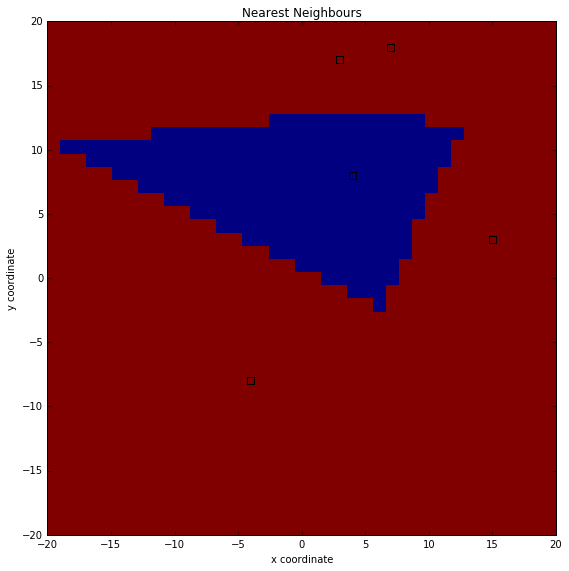

In [75]:
# Synthetic observations and source coordinates
src = np.vstack( (np.array([4, 7, 3, 15, -4,4]), np.array([8, 18, 17, 3, -8,8]))).transpose()
vals = np.arange(len(src))
vals = vals/vals
# Target coordinates
xtrg = np.linspace(-20, 20, 40)
ytrg = np.linspace(-20, 20, 40)
trg = np.meshgrid(xtrg, ytrg)
trg = np.vstack( (trg[0].ravel(), trg[1].ravel()) ).T

# Interpolation objects
nn = Nearest(src, trg)

# Subplot layout
def gridplot(interpolated, title=""):
    pm = ax.pcolormesh(xtrg, ytrg, interpolated.reshape( (len(xtrg), len(ytrg)) ) )
    plt.axis("tight")
    ax.scatter(src[:, 0], src[:, 1], facecolor="None", s=50, marker='s')
    plt.title(title)
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")

# Plot results
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, aspect="equal")
gridplot(nn(vals), "Nearest Neighbours")

plt.tight_layout()

In [77]:
np.unique(nn(vals))

array([0, 1])